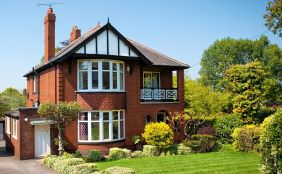

### Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [4]:
pd.options.display.max_columns=30
df=pd.read_csv("/content/drive/MyDrive/Deep Learning/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Basic Information about dataset

- id -	A notation for a house
- date - 	Date house was sold
- price - 	Price is prediction target
- bedrooms -	Number of bedrooms
- bathrooms - 	Number of bathrooms
- sqft_living - 	Square footage of the home
- sqft_lot -	Square footage of the lot
- floors -	Total floors (levels) in house
- waterfront - 	House which has a view to a waterfront
- view - 	Has been viewed
- condition - 	How good the condition is overall
- grade - 	overall grade given to the housing unit, based on King County grading system
- sqft_above - 	Square footage of house apart from basement
- sqft_basement - 	Square footage of the basement
- yr_built - 	Built Year
- yr_renovated - 	Year when house was renovated
- zipcode - 	Zip code
- lat - 	Latitude coordinate
- long - 	Longitude coordinate
- sqft_living15 - 	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- sqft_lot15 - 	LotSize area in 2015(implies-- some renovations)

In [6]:
df.shape

(21613, 21)

In [7]:
df.size

453873

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Five point statistical summary

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


### Missing Values

In [13]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicate rows

In [14]:
df.duplicated().sum()

0

### Data Preprocessing

#### Drop few columns like id, sqft_living, sqft_lot, lat, long.

In [15]:
df.drop(['id','sqft_living','sqft_lot','lat','long','date'], axis=1, inplace=True)
df.shape

(21613, 15)

#### Rename sqft_living15 & sqft_lot15 to sqft_living and sqft_lot

In [16]:
df.rename({'sqft_living15':'sqft_living','sqft_lot15':'sqft_lot'}, axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'sqft_living', 'sqft_lot'],
      dtype='object')

### Exploratory Data Analysis

### Univariate Analysis

#### Analyzing Price column

In [17]:
df['price'].describe().round(2)

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

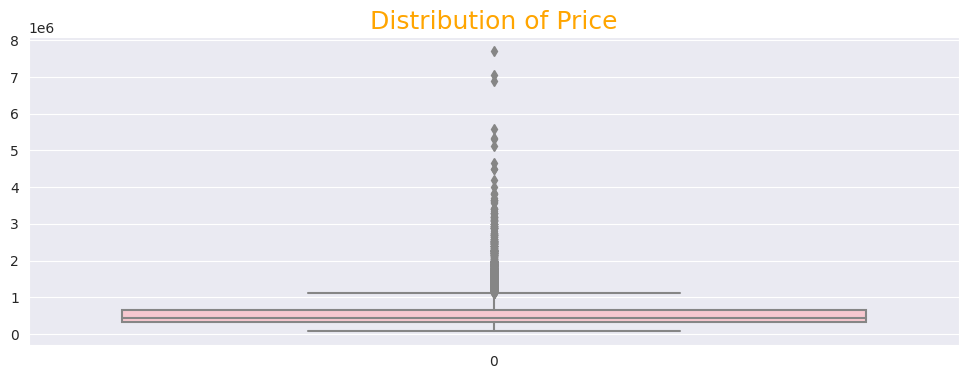

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.boxplot(df['price'], color='pink');
plt.title("Distribution of Price", fontsize=18, color='orange');

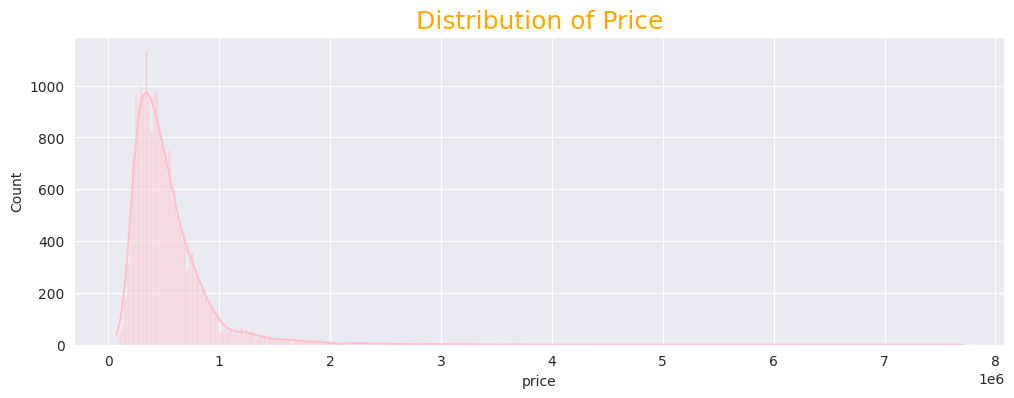

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.histplot(df['price'], kde=True, color='pink');
plt.title("Distribution of Price", fontsize=18, color='orange');

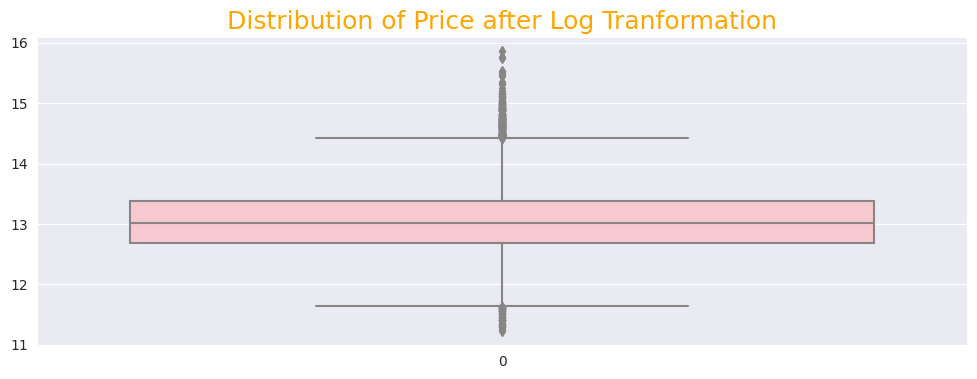

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.boxplot(np.log(df['price']), color='pink')
plt.title("Distribution of Price after Log Tranformation", fontsize=18, color='orange');

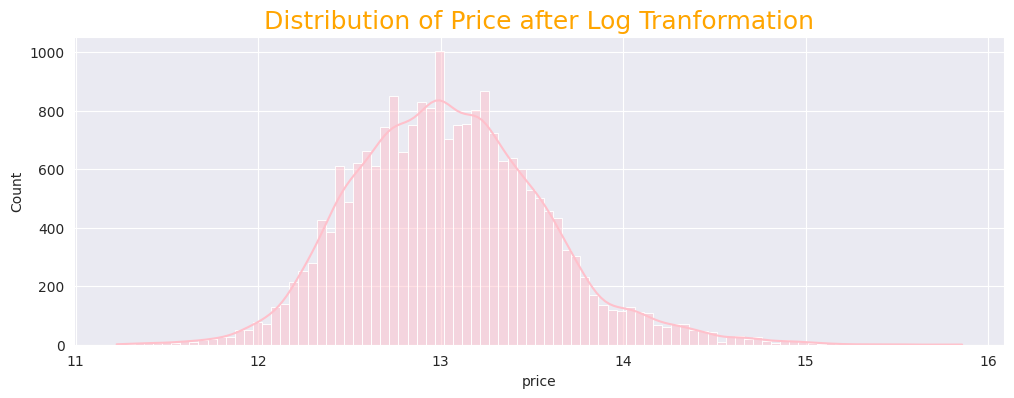

In [21]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,4))
sns.histplot(np.log(df['price']), kde=True, color='pink')
plt.title("Distribution of Price after Log Tranformation", fontsize=18, color='orange');

#### Price column contains extream outliers so Log tranformation on Price columns makes the column normally distributed so use this tranformed column instead of price column.

In [22]:
df['price_log']=np.log(df['price']+1)
df.drop('price', axis=1, inplace=True)
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living', 'sqft_lot', 'price_log'],
      dtype='object')

### Analyze Bedrooms columns

In [23]:
df['bedrooms'].describe().round(0)

count    21613.0
mean         3.0
std          1.0
min          0.0
25%          3.0
50%          3.0
75%          4.0
max         33.0
Name: bedrooms, dtype: float64

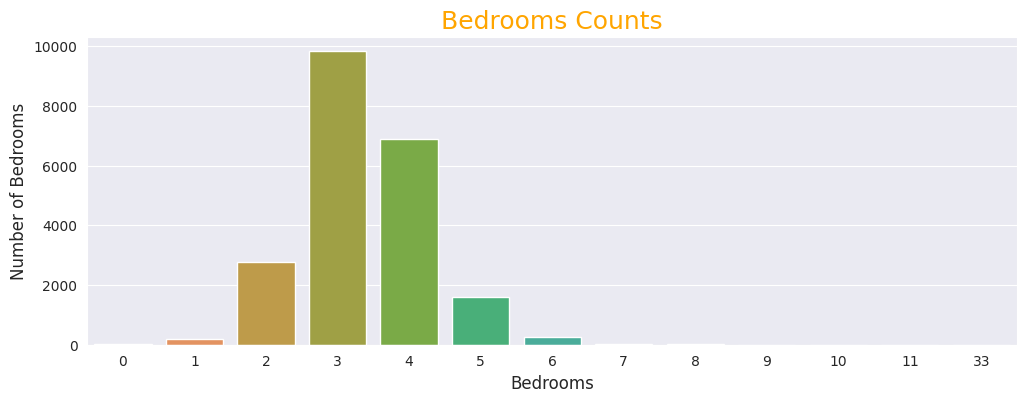

In [24]:
plt.figure(figsize=(12,4))
sns.countplot(x='bedrooms', data=df);
plt.xlabel("Bedrooms", fontsize=12)
plt.ylabel("Number of Bedrooms", fontsize=12)
plt.title("Bedrooms Counts", fontsize=18, color='orange');

### Analyse Bathrooms

In [25]:
df['bathrooms'].dtype

dtype('float64')

In [26]:
df['bathrooms']=df['bathrooms'].astype(int)
df['bathrooms'].dtype

dtype('int64')

In [27]:
df['bathrooms'].describe().round(0)

count    21613.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          2.0
max          8.0
Name: bathrooms, dtype: float64

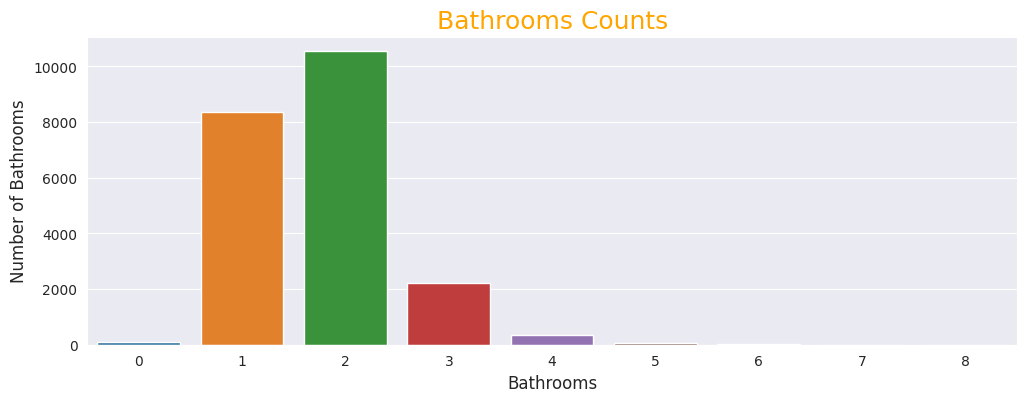

In [28]:
plt.figure(figsize=(12,4))
sns.countplot(x='bathrooms', data=df);
plt.xlabel("Bathrooms", fontsize=12)
plt.ylabel("Number of Bathrooms", fontsize=12)
plt.title("Bathrooms Counts", fontsize=18, color='orange');

### Analyze floor, waterfron and view columns

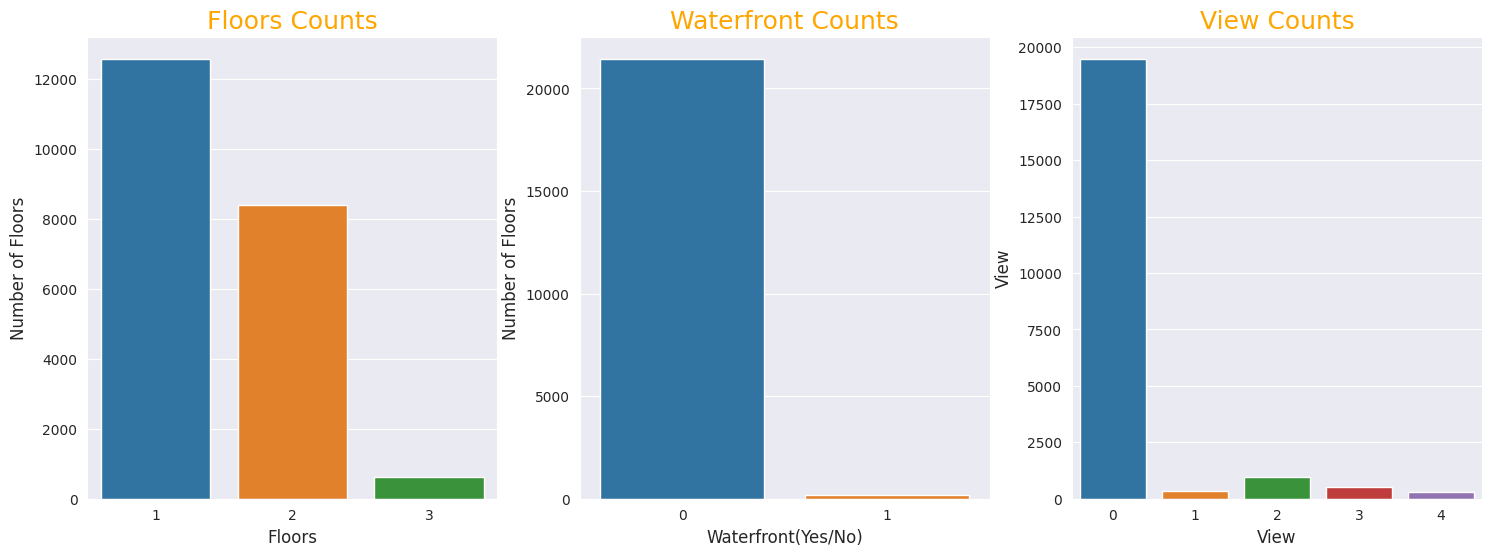

In [29]:
plt.figure(figsize=(18,6))
plt.subplot(131)
df['floors']=df['floors'].astype(int)
sns.countplot(x='floors', data=df);
plt.xlabel("Floors", fontsize=12)
plt.ylabel("Number of Floors", fontsize=12)
plt.title("Floors Counts", fontsize=18, color='orange');

plt.subplot(132)
sns.countplot(x='waterfront', data=df);
plt.xlabel("Waterfront(Yes/No)", fontsize=12)
plt.ylabel("Number of Floors", fontsize=12)
plt.title("Waterfront Counts", fontsize=18, color='orange');

plt.subplot(133)
sns.countplot(x='view', data=df);
plt.xlabel("View", fontsize=12)
plt.ylabel("View", fontsize=12)
plt.title("View Counts", fontsize=18, color='orange');

### Analyze Condition and Grade column

In [30]:
df['condition'].describe().round(0)

count    21613.0
mean         3.0
std          1.0
min          1.0
25%          3.0
50%          3.0
75%          4.0
max          5.0
Name: condition, dtype: float64

In [31]:
df['grade'].describe().round(0)

count    21613.0
mean         8.0
std          1.0
min          1.0
25%          7.0
50%          7.0
75%          8.0
max         13.0
Name: grade, dtype: float64

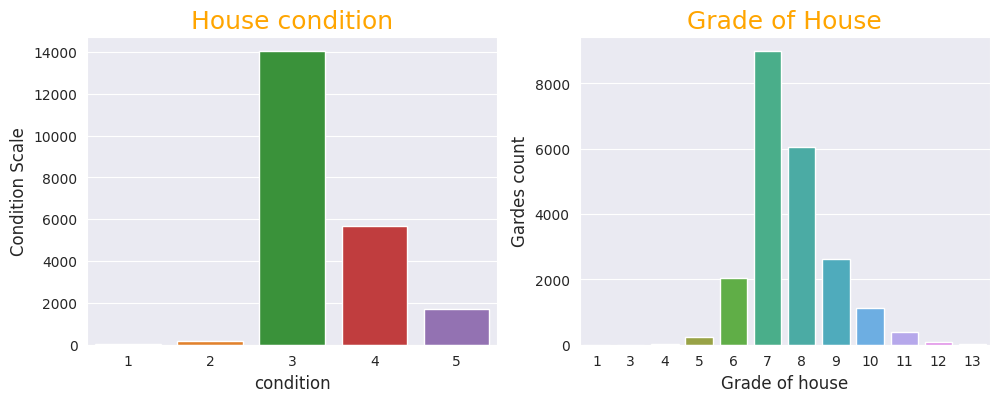

In [32]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.countplot(x='condition', data=df);
plt.xlabel("condition", fontsize=12)
plt.ylabel("Condition Scale", fontsize=12)
plt.title("House condition", fontsize=18, color='orange');

plt.subplot(132)
sns.countplot(x='grade', data=df);
plt.xlabel("Grade of house", fontsize=12)
plt.ylabel("Gardes count", fontsize=12)
plt.title("Grade of House", fontsize=18, color='orange');

### Analyze Area related column

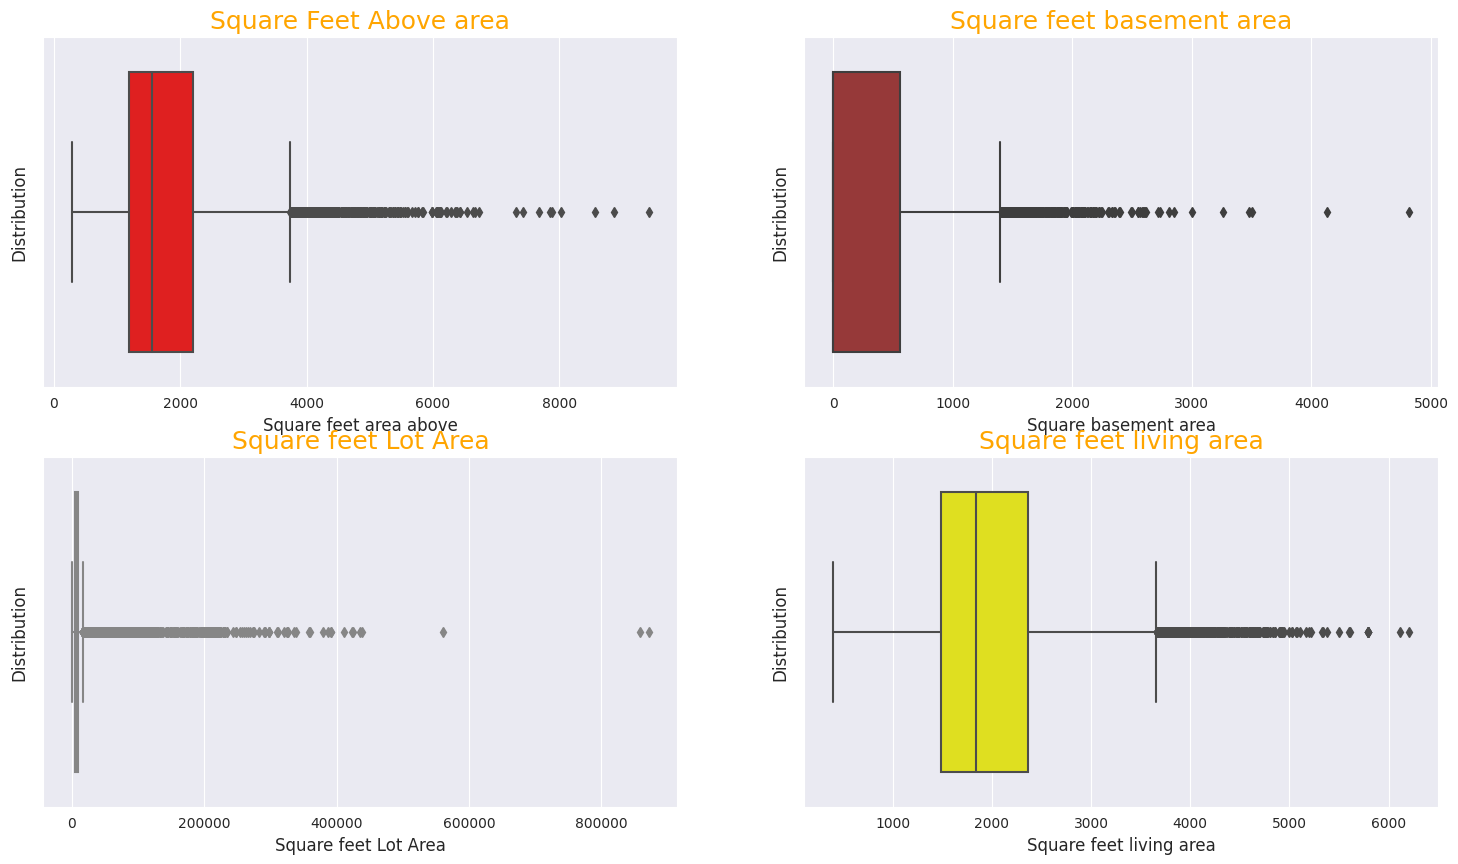

In [33]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.boxplot(x='sqft_above', data=df, color='red');
plt.xlabel("Square feet area above", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Square Feet Above area", fontsize=18, color='orange');

plt.subplot(222)
sns.boxplot(x='sqft_basement', data=df, color='brown');
plt.xlabel("Square basement area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Square feet basement area", fontsize=18, color='orange');

plt.subplot(223)
sns.boxplot(x='sqft_lot', data=df, color='pink');
plt.xlabel("Square feet Lot Area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Square feet Lot Area", fontsize=18, color='orange');

plt.subplot(224)
sns.boxplot(x='sqft_living', data=df, color='yellow');
plt.xlabel("Square feet living area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Square feet living area", fontsize=18, color='orange');

#### We can see the outliers in these area related columns so lets use log transformation.

In [34]:
df['sqft_above_log']=np.log(df['sqft_above']+1)
df['sqft_basement_log']=np.log(df['sqft_basement']+1)
df['sqft_lot_log']=np.log(df['sqft_lot']+1)
df['sqft_living_log']=np.log(df['sqft_living']+1)
df.drop(['sqft_above','sqft_basement','sqft_lot','sqft_living'], axis=1, inplace=True)

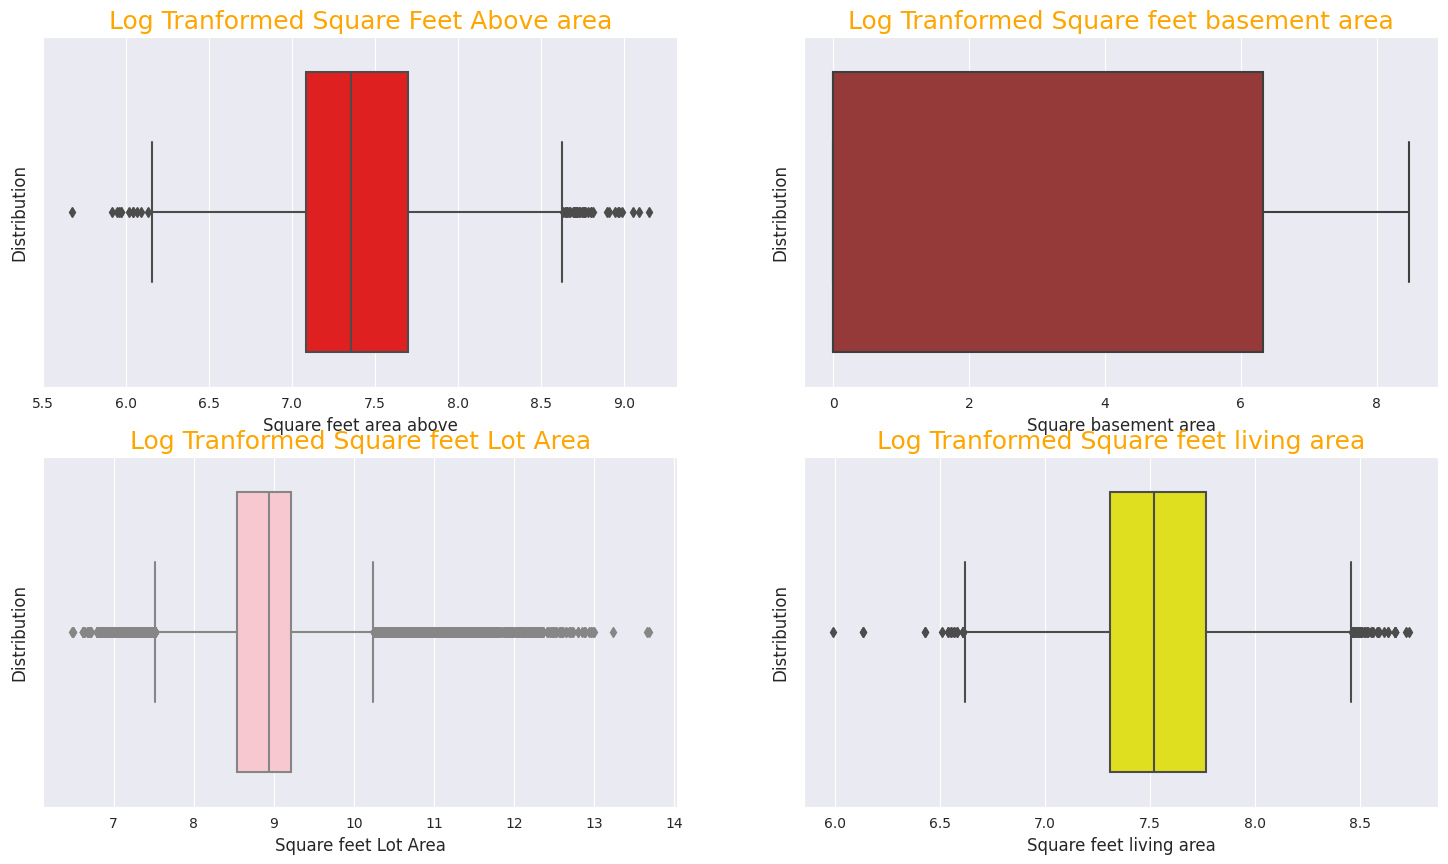

In [35]:
plt.figure(figsize=(18,10))
plt.subplot(221)
sns.boxplot(x='sqft_above_log', data=df, color='red');
plt.xlabel("Square feet area above", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Log Tranformed Square Feet Above area", fontsize=18, color='orange');

plt.subplot(222)
sns.boxplot(x='sqft_basement_log', data=df, color='brown');
plt.xlabel("Square basement area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Log Tranformed Square feet basement area", fontsize=18, color='orange');

plt.subplot(223)
sns.boxplot(x='sqft_lot_log', data=df, color='pink');
plt.xlabel("Square feet Lot Area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Log Tranformed Square feet Lot Area", fontsize=18, color='orange');

plt.subplot(224)
sns.boxplot(x='sqft_living_log', data=df, color='yellow');
plt.xlabel("Square feet living area", fontsize=12)
plt.ylabel("Distribution", fontsize=12)
plt.title("Log Tranformed Square feet living area", fontsize=18, color='orange');

In [36]:
df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price_log',
       'sqft_above_log', 'sqft_basement_log', 'sqft_lot_log',
       'sqft_living_log'],
      dtype='object')

### Analyze Year Built and Renewed Year column

In [37]:
df['yr_renovated'].min(), df['yr_renovated'].max()

(0, 2015)

In [38]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2015)

#### In the rows renovated year is 0 that means these houses are not renewed, so replace 0 with the built year.

In [39]:
df[df['yr_renovated']==0].shape

(20699, 15)

#### Drop Year Renevated column

In [40]:
df.drop('yr_renovated', axis=1, inplace=True)

### Analyze Zip code

In [41]:
df['zipcode'].nunique()

70

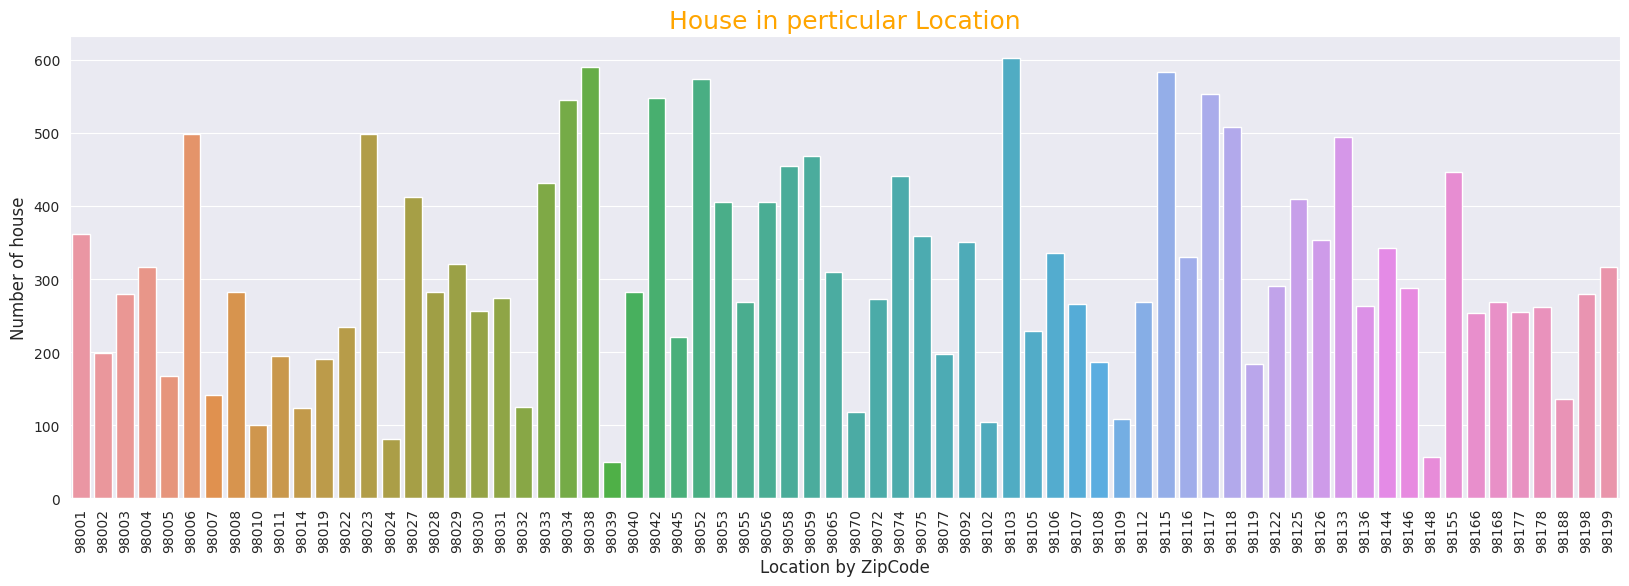

In [42]:
plt.figure(figsize=(20,6))
sns.countplot(x='zipcode', data=df)
plt.xticks(rotation=90)
plt.xlabel("Location by ZipCode", fontsize=12)
plt.ylabel("Number of house", fontsize=12)
plt.title("House in perticular Location", fontsize=18, color='orange');

#### Apply label encoding for zipcode

In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['zipcode']=label_encoder.fit_transform(df['zipcode'])
df['zipcode'][:10]

0    66
1    55
2    16
3    58
4    37
5    29
6     2
7    68
8    60
9    23
Name: zipcode, dtype: int64

In [44]:
df['yr_built']=label_encoder.fit_transform(df['yr_built'])
df['yr_built'][:10]

0     55
1     51
2     33
3     65
4     87
5    101
6     95
7     63
8     60
9    103
Name: yr_built, dtype: int64

In [45]:
df.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,price_log,sqft_above_log,sqft_basement_log,sqft_lot_log,sqft_living_log
0,3,1,1,0,0,3,7,55,66,12.309987,7.074117,0.000000,8.639588,7.201171
1,3,2,2,0,0,3,7,51,55,13.195616,7.682943,5.993961,8.941153,7.433075
2,2,1,1,0,0,3,6,33,16,12.100718,6.647688,0.000000,8.995041,7.908755
3,4,3,1,0,0,5,7,65,58,13.311331,6.957497,6.814543,8.517393,7.215975
4,3,2,1,0,0,3,8,87,37,13.142168,7.427144,0.000000,8.923191,7.496097


### Split into Input and output

In [46]:
X=df.drop('price_log', axis=1)
y=df['price_log']

### Train test split

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 13), (4323, 13), (17290,), (4323,))

In [49]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_fit=std.fit(x_train)
x_train_tf=std_fit.transform(x_train)
x_test_tf=std_fit.transform(x_test)

In [50]:
x_train_tf[:5]

array([[-0.39003389, -1.02247862, -0.80980713, -0.09067554, -0.30872938,
         0.9125681 , -0.56106598, -1.05018286,  0.71979467, -0.97657401,
         1.15884716, -0.24229631, -0.18631661],
       [-0.39003389,  0.33773184, -0.80980713, -0.09067554, -0.30872938,
         0.9125681 ,  0.28898929,  0.30645855, -1.56395646, -0.68992337,
         1.20005226,  0.26918602,  0.62580271],
       [-0.39003389, -1.02247862, -0.80980713, -0.09067554, -0.30872938,
        -0.62557797,  0.28898929,  0.54387079,  0.09695345, -0.93340406,
        -0.79978391,  0.28940751, -0.29149142],
       [ 0.67029408,  0.33773184,  0.99335645, -0.09067554, -0.30872938,
        -0.62557797,  0.28898929,  0.74736701, -0.83730837,  0.71470077,
        -0.79978391, -0.12907513,  0.1401859 ],
       [-0.39003389,  0.33773184,  0.99335645, -0.09067554, -0.30872938,
        -0.62557797, -0.56106598,  0.47603872,  0.92740841, -0.63282585,
         1.1944856 , -0.59911815, -0.15204876]])

In [51]:
x_test_tf[:5]

array([[-1.45036186, -1.02247862,  2.79652003, -0.09067554, -0.30872938,
        -0.62557797, -0.56106598,  0.95086322,  1.03121528, -0.30043773,
        -0.79978391, -1.89302068, -0.83681182],
       [ 0.67029408,  1.69794229,  0.99335645, -0.09067554, -0.30872938,
         0.9125681 ,  3.68921038,  0.57778683, -1.61585989,  2.45981845,
        -0.79978391,  2.03132841,  2.47123416],
       [-1.45036186, -2.38268907, -0.80980713, -0.09067554, -0.30872938,
        -0.62557797, -0.56106598, -1.93199978,  0.51218093, -0.70927065,
         0.92828017, -0.7239534 , -0.81556159],
       [-1.45036186, -1.02247862, -0.80980713, -0.09067554, -0.30872938,
         0.9125681 ,  0.28898929, -1.49109132,  0.6159878 , -0.84938891,
        -0.79978391, -1.08461787, -0.34547019],
       [ 0.67029408,  0.33773184,  0.99335645, -0.09067554,  2.28501745,
        -0.62557797,  1.13904456,  1.05261132,  1.39453933,  1.56342894,
        -0.79978391,  0.82246682,  0.79280467]])

### ANN Model to predict House price

In [52]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [53]:
model=Sequential()
model.add(Dense(units=32, kernel_initializer='normal', activation='relu', input_dim=13))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=124, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=252, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=512, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=1, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 124)               8060      
                                                                 
 dense_3 (Dense)             (None, 252)               31500     
                                                                 
 dense_4 (Dense)             (None, 512)               129536    
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 172,169
Trainable params: 172,169
Non-trai

In [54]:
#compile layer
model.compile(optimizer='adam', loss='MeanSquaredError', metrics='mean_squared_error')

In [55]:
model.fit(x_train_tf, y_train, epochs=100, batch_size=32, validation_data=(x_test_tf,y_test))

Epoch 1/100
541/541 [==============================] - 14s 12ms/step - loss: 4.7498 - mean_squared_error: 4.7498 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 2/100
541/541 [==============================] - 4s 8ms/step - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.0888 - val_mean_squared_error: 0.0888
Epoch 3/100
541/541 [==============================] - 5s 8ms/step - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0897 - val_mean_squared_error: 0.0897
Epoch 4/100
541/541 [==============================] - 5s 10ms/step - loss: 0.0938 - mean_squared_error: 0.0938 - val_loss: 0.0985 - val_mean_squared_error: 0.0985
Epoch 5/100
541/541 [==============================] - 4s 8ms/step - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.0994 - val_mean_squared_error: 0.0994
Epoch 6/100
541/541 [==============================] - 2s 4ms/step - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.1275 - val_mean_squared_error: 0.1275
Epoch 7/100
541/541

### Evaluate Model

In [56]:
y_pred=model.predict(x_test_tf)
y_pred

136/136 [==============================] - 0s 2ms/step


array([[12.714164 ],
       [14.262418 ],
       [13.079125 ],
       ...,
       [12.595751 ],
       [12.372047 ],
       [12.8868885]], dtype=float32)

In [57]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.07513099125432587


In [58]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test,y_pred))

0.015833533500713582


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7192043608429186

In [60]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(x_train, y_train, x_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    # store the results indataframe
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'MSE']) 
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model=Sequential()
            model.add(Dense(units=32, kernel_initializer='normal', activation='relu', input_dim=13))
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=124, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=252, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=512, kernel_initializer='normal', activation='tanh'))
            model.add(Dense(units=1, activation='relu'))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(x_train_tf, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            from sklearn.metrics import mean_squared_error as mse
            MSE=mse(y_test, model.predict(x_test_tf))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MSE:', MSE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), MSE]],
                                                                    columns=['TrialNumber', 'Parameters', 'MSE'] ))
    return(SearchResultsData)


    

In [61]:
# Calling the function
ResultsData=FunctionFindBestParams(x_train_tf, y_train, x_test_tf, y_test)

136/136 [==============================] - 1s 5ms/step
1 Parameters: batch_size: 5 - epochs: 5 MSE: 0.07910042943654502
136/136 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 MSE: 0.078101822478461
136/136 [==============================] - 0s 2ms/step
3 Parameters: batch_size: 5 - epochs: 50 MSE: 0.07645913185131019
136/136 [==============================] - 0s 1ms/step
4 Parameters: batch_size: 5 - epochs: 100 MSE: 0.07034345821068091
136/136 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 MSE: 0.08448112346785369
136/136 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 MSE: 0.07643959994152305
136/136 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 MSE: 0.0689710719124167
136/136 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 MSE: 0.08105869442595309
136/136 [======================

In [66]:
model.fit(x_train_tf,y_train,batch_size=20,epochs=50,verbose=0)

In [67]:
y_pred=model.predict(x_test_tf)
y_pred[:10]

136/136 [==============================] - 0s 2ms/step


array([[12.632328],
       [14.222411],
       [13.216299],
       [13.331963],
       [13.50709 ],
       [13.036218],
       [12.906507],
       [13.180118],
       [13.314836],
       [14.364366]], dtype=float32)

In [65]:
r2_score(y_test,y_pred)

0.6842301645122497